# Preprocessing Banjir

Anggota:
- Ahmad Danindra Nugroho (5025211259)
- Muhammad Ghifari Taqiuddin (5025211063)
- Raihan Farid (5025201141)
- Talitha Hayyinas Sahala (5025211263)

# Preparations

In [76]:
# Installing dependencies
# Only run once
%pip install gnews nlp-id PySastrawi pillow matplotlib numpy wordcloud pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [77]:
# Import all dependencies
from nlp_id import tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os

In [78]:
# Directory for all related files
dataset_dir = '../dataset/'
os.makedirs(dataset_dir, exist_ok=True)

In [79]:
os.listdir(dataset_dir)

['Gempa Bumi-2018-2023.csv',
 'Kebakaran-2018-2023.csv',
 'Banjir-2018-2023.csv',
 'Kecelakaan-2018-2023.csv']

## Loading Dataset

In [80]:
df = pd.read_csv(os.path.join(dataset_dir, 'Banjir-2018-2023.csv'))
df = df.drop(columns=['description' , 'url', 'publisher'])
df['title'] = df['title'].apply(lambda x: x.split(' - ')[0])
df = df[['published date', 'title']]
print(df.shape)
df.head()

(6400, 2)


,published date,title
0,2018-02-02 08:00:00+00:00,Banjir genangi 23 desa di Kabupaten Jember
1,2018-02-04 08:00:00+00:00,"Ini, 11 Titik Banjir di Denpasar yang Belum Te..."
2,2018-02-04 08:00:00+00:00,FOTO: Banjir Rob Terjang Semarang
3,2018-02-05 08:00:00+00:00,"Longsor tewaskan tiga orang, Jakarta mulai ban..."
4,2018-02-05 08:00:00+00:00,Jalur Pantura Kudus tersendat akibat banjir


In [ ]:

# # Load your data into a pandas DataFrame
# df = pd.read_csv(os.path.join(dataset_dir, 'Banjir-2018-2023.csv'))

# # Dropping unnecessary columns
# df = df.drop(columns=['description', 'url', 'publisher'])

# # Extracting only the title part before ' - '
# df['source'] = df['title'].apply(lambda x: x.split(' - ')[1] if ' - ' in x else '')

# # Defining the list of news sources
# news_sources = ['CNN Indonesia', 'ANTARA', 'detikNews', 'Kompas', 'JawaPos', 'TribunNews', 'Kumparan', 'Okezone', 'IDN Times']

# # List to store filtered rows
# filtered_rows = []

# # Loop through each row
# for index, row in df.iterrows():
#     if row['source'] in news_sources:
#         filtered_rows.append(row)

# # Creating a DataFrame from the filtered rows
# filtered_df = pd.DataFrame(filtered_rows)

# # Printing the shape of filtered DataFrame
# df(filtered_df.shape)

# # Displaying the first few rows of the filtered DataFrame
# df(filtered_df.head(50))

## Preprocessing

1. Casefolding: mengubah semua karakter huruf ke huruf kecil
2. Stemming: mengubah suatu kata menjadi bentuk dasarnya (mengatakan -> kata)
3. Tokenization: memecah kalimat menjadi beberapa token
4. Stopwords Removal: memfilter kata yang sering muncul tapi tidak berpengaruh dalam pemrosesan (tergantung umumnya konjungsi, preposisi, pronomina, dsb.)

In [81]:
# 1. Casefolding
df['title'] = df['title'].str.lower()
df.head()

,published date,title
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te..."
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban..."
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir


In [82]:
# 2. Stemming
# Menggunakan stemmer dari library PySastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stem'] = df['title'].apply(stemmer.stem)
df.head()

,published date,title,stem
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir


In [83]:
# 3. Tokenization
# Menggunakan tokenizer dari library nlp-id
tok = tokenizer.Tokenizer()

df['tokens'] = df['stem'].apply(tok.tokenize)
df.head()

,published date,title,stem,tokens
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember,"[banjir, genang, 23, desa, di, kabupaten, jember]"
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...,"[ini, 11, titik, banjir, di, denpasar, yang, b..."
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang,"[foto, banjir, rob, terjang, semarang]"
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...,"[longsor, tewas, tiga, orang, jakarta, mulai, ..."
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"[jalur, pantura, kudus, sendat, akibat, banjir]"


In [84]:
# 4. Stopwords removal
# Menggunakan list stopwords dari library nltk
list_stopwords = set(stopwords.words('indonesian'))


def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

keywords = ['hujat', 'air mata', 'puji', 'pesan', 'komentar', 'diskon', 'promo', 'duka', 'kritik', 'dukung', 'doa', 'rezeki', 'protes']
mask = df['title'].str.contains('|'.join(keywords), case=False)
df = df[~mask]

# Apply remove_stopwords function to clean tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

df['tokens_clean'] = df['tokens'].apply(remove_stopwords)
df.head()

,published date,title,stem,tokens,tokens_clean
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember,"[banjir, genang, 23, desa, di, kabupaten, jember]","[banjir, genang, 23, desa, kabupaten, jember]"
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...,"[ini, 11, titik, banjir, di, denpasar, yang, b...","[11, titik, banjir, denpasar, tangan, balipost..."
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang,"[foto, banjir, rob, terjang, semarang]","[foto, banjir, rob, terjang, semarang]"
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...,"[longsor, tewas, tiga, orang, jakarta, mulai, ...","[longsor, tewas, orang, jakarta, banjir, ungsi..."
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"[jalur, pantura, kudus, sendat, akibat, banjir]","[jalur, pantura, kudus, sendat, akibat, banjir]"


In [88]:
# # Define the sources to keep
# sources_to_keep = ['CNN Indonesia', 'Liputan6.com', 'Detiknews', 'Kompas', 'JawaPos', 'ANTARA', 'TribunNews', 'Kumparan', 'Okezone.com', 'IDN Times']

# # Create a mask for rows with the desired sources
# mask = df['source'].str.lower().isin(sources_to_keep)

# # Filter the DataFrame to keep only rows with the desired sources
# df = df[mask]

# # Display the filtered DataFrame
# print(df.head())


In [ ]:
df[df['title'].str.contains("protes")]

In [89]:
# Mengecek jumlah data dalam DataFrame
jumlah_data = df.shape[0]
print("Jumlah data dalam DataFrame adalah:", jumlah_data)

Jumlah data dalam DataFrame adalah: 6059


In [90]:
# Gabungkan kembali token pada kolom 'tokens_clean'
df['merged'] = df['tokens_clean'].apply(lambda token: ' '.join(token))
df.head()

,published date,title,stem,tokens,tokens_clean,merged
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember,"[banjir, genang, 23, desa, di, kabupaten, jember]","[banjir, genang, 23, desa, kabupaten, jember]",banjir genang 23 desa kabupaten jember
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...,"[ini, 11, titik, banjir, di, denpasar, yang, b...","[11, titik, banjir, denpasar, tangan, balipost...",11 titik banjir denpasar tangan balipost com
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang,"[foto, banjir, rob, terjang, semarang]","[foto, banjir, rob, terjang, semarang]",foto banjir rob terjang semarang
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...,"[longsor, tewas, tiga, orang, jakarta, mulai, ...","[longsor, tewas, orang, jakarta, banjir, ungsi...",longsor tewas orang jakarta banjir ungsi langsung
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"[jalur, pantura, kudus, sendat, akibat, banjir]","[jalur, pantura, kudus, sendat, akibat, banjir]",jalur pantura kudus sendat akibat banjir


## Visualisasi WordCloud

Pembanding data antara sebelum dan setelah dilakukan pra-pemrosesan

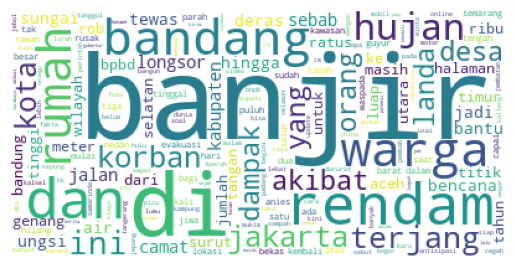

In [91]:
text_before = ' '.join(df['stem'].tolist())
wordcloud_before = WordCloud(background_color='white', collocations=False).generate(text_before)

plt.imshow(wordcloud_before)
plt.axis("off")
plt.show()

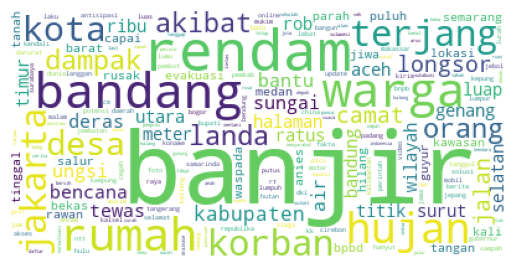

In [92]:
text_after = ' '.join(df['merged'])
wordcloud_after = WordCloud(background_color='white', collocations=False).generate(text_after)

plt.imshow(wordcloud_after)
plt.axis("off")
plt.show()

In [ ]:
# Simpan output ke dalam CSV
df.to_csv('Banjir-2018-2023-pre.csv', index=False)